In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
heart_data = pd.read_csv("D:/New folder (2)/heart.csv")

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart_data = heart_data.dropna()

In [6]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
heart_data.shape

(1025, 14)

In [9]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 120.1 KB


# Statistical representation of the data

In [11]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

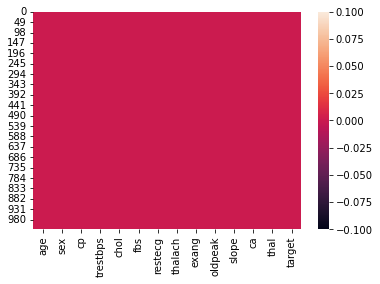

In [65]:
sns.heatmap(heart_data.isna())

In [13]:
heart_data.duplicated().sum()

723

In [14]:
heart_data["fbs"].value_counts()

0    872
1    153
Name: fbs, dtype: int64

In [15]:
heart_data["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [16]:
heart_data["cp"].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [17]:
heart_data["restecg"].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [18]:
numerical_columns = ["age","trestbps","chol","thalach","oldpeak","slope","ca","thal"]

In [19]:
categorical_col = list(set(heart_data.columns) - set(numerical_columns)-{"target"})

In [20]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Splitting the data

In [22]:
heart_data_train,heart_data_test = train_test_split(heart_data,test_size=0.2,random_state=42)

In [23]:
len(heart_data_train),len(heart_data_test)

(820, 205)

# Visualisation

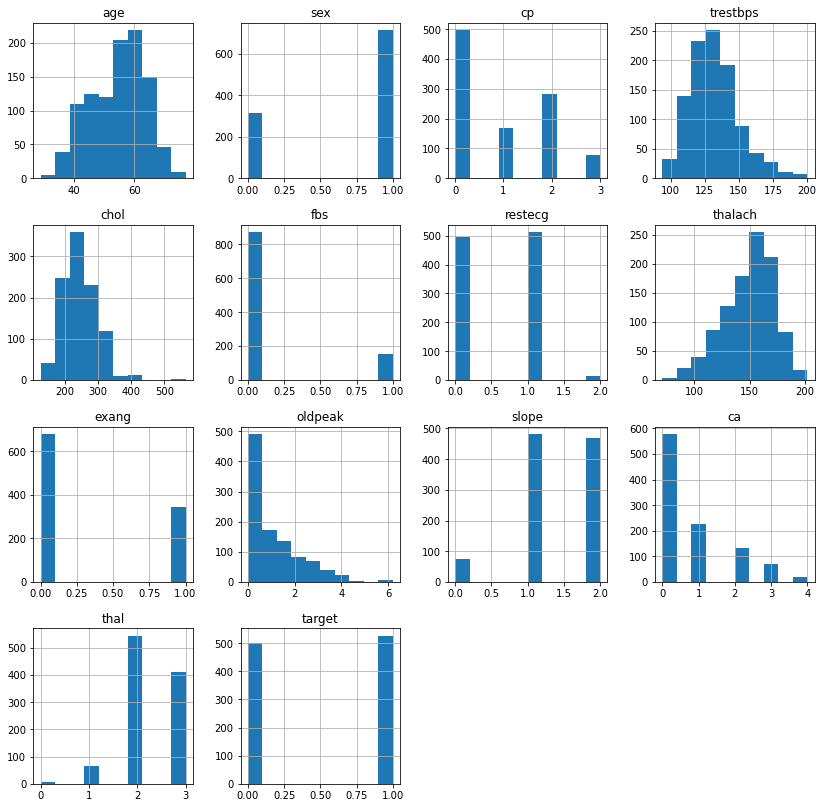

In [24]:
heart_data.hist(figsize=(14,14))
plt.show()

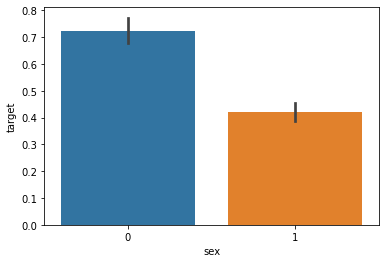

In [25]:
sns.barplot(heart_data['sex'],heart_data['target'])
plt.show()

In [26]:
#0--->Female
#1--->Male

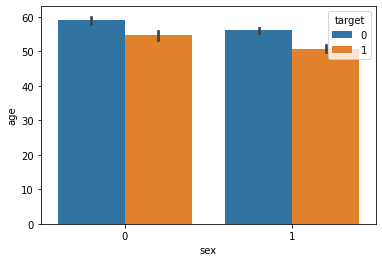

In [27]:
sns.barplot(heart_data['sex'],heart_data['age'],hue=heart_data['target'])
plt.show()

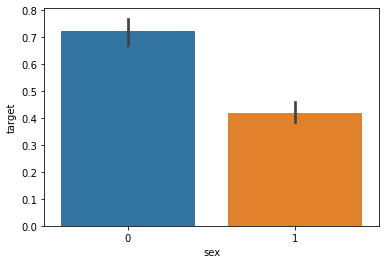

In [28]:
sns.barplot(heart_data['sex'],heart_data['target'])
plt.show()

In [29]:
numeric_columns=['age','trestbps','chol','thalach','oldpeak']

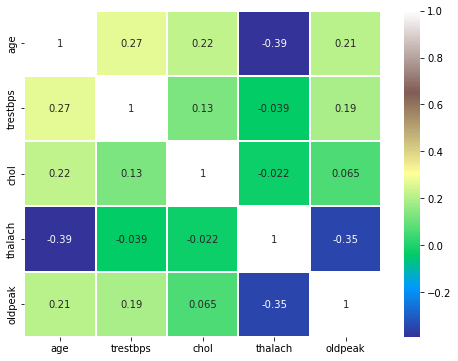

In [68]:
sns.heatmap(heart_data[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [69]:
# Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation,
#with the target value while some have positive.

# Checking the distribution of the target variable

In [31]:
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

# 1 Represents Defective Heart
# 0 Represents Healthy Heart


Splitting the features and target variables

In [32]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [33]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [34]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [35]:
#Splitting the data into training and testing data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, stratify=Y, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (512, 13) (513, 13)


In [38]:
# Model Training 

# Logistic Regression Model

In [39]:
model = LogisticRegression()

In [40]:
# Training the LogisticRegression model with Training data

In [41]:
model.fit(X_train, Y_train)

LogisticRegression()

In [42]:
#Model Evaluation

In [43]:
#Accuracy Score, acccuracy on the training data

In [44]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [45]:
print('Accuracy on Training data :', training_data_accuracy)

Accuracy on Training data : 0.873046875


In [46]:
#Accuracy Score, acccuracy on the testing data

In [47]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [48]:
print('Accuracy on Testing data :', testing_data_accuracy)

Accuracy on Testing data : 0.8362573099415205


In [49]:
#Building a predictive system

In [50]:
input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)
#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
#Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('The person does not have heart diseases')
else:
    print('The person has heart diseases')

[1]
The person has heart diseases


In [51]:
input_data = (62,0,0,138,294,1,1,106,0,1.9,1,3,2)
#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
#Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('The person does not have heart diseases')
else:
    print('The person has heart diseases')

[0]
The person does not have heart diseases


In [52]:
mean_squared_error(Y_test , X_test_prediction)

0.16374269005847952

In [53]:
accuracy_score(Y_test , X_test_prediction)

0.8362573099415205

In [54]:
confusion_matrix(Y_test , X_test_prediction)

array([[196,  54],
       [ 30, 233]], dtype=int64)

# Decision Tree

In [55]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

dt_pred = dt.predict(X_test)
print(mean_squared_error(Y_test , dt_pred))
print(accuracy_score(Y_test , dt_pred))
print(confusion_matrix(Y_test , dt_pred))

0.037037037037037035
0.9629629629629629
[[243   7]
 [ 12 251]]


# Random Forest

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

rf_pred = rf.predict(X_test)
print(mean_squared_error(Y_test , rf_pred))
print(accuracy_score(Y_test , rf_pred))
print(confusion_matrix(Y_test , rf_pred))

0.025341130604288498
0.9746588693957114
[[243   7]
 [  6 257]]


# Support Vector Machine

In [57]:
svm = DecisionTreeClassifier()
svm.fit(X_train,Y_train)

svm_pred = svm.predict(X_test)
print(mean_squared_error(Y_test , svm_pred))
print(accuracy_score(Y_test , svm_pred))
print(confusion_matrix(Y_test , svm_pred))

0.031189083820662766
0.9688109161793372
[[243   7]
 [  9 254]]


# KNN Model

In [58]:

knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train,Y_train)
prediction=knn_classifier.predict(X_test)
confusion_matrix = confusion_matrix(Y_test,prediction)
print(confusion_matrix)
accuracy_score = accuracy_score(Y_test,prediction)
print(accuracy_score)
print(mean_squared_error(Y_test ,prediction))


[[165  85]
 [ 63 200]]
0.7115009746588694
0.2884990253411306


# Linear Regression

In [59]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=0.2, random_state=0)
model =  LinearRegression()

model.fit(X_train,Y_train)

print(model.coef_)

[-0.00142407 -0.22522584  0.11043456 -0.00191052 -0.00047189  0.01319483
  0.06257857  0.00288788 -0.14511887 -0.07432679  0.05980935 -0.08750993
 -0.11628397]


In [60]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=0.2, random_state=0)

In [61]:
model =  LinearRegression()

model.fit(X_train,Y_train)

print(model.coef_)

[-0.00142407 -0.22522584  0.11043456 -0.00191052 -0.00047189  0.01319483
  0.06257857  0.00288788 -0.14511887 -0.07432679  0.05980935 -0.08750993
 -0.11628397]


In [62]:
Lr_pred = model.predict(X_test)
print(Lr_pred)

[ 0.7916613   0.70694344 -0.17619832  0.84803612 -0.06112919 -0.00225099
  0.32665554 -0.04721414  0.09252242  0.62767445  0.5140454  -0.37462833
  0.59468496  0.54848174  0.85908518  1.03995607  1.01256263 -0.11352404
  1.14787865  0.33359437  0.85532506  0.80662939  0.67694071  0.80662939
  1.03995607  0.93970471  1.05192526  0.65184137  1.12164342  1.16122465
  1.11968646 -0.04721414  0.05260376  0.68051652  0.31809994 -0.20270084
  0.52065046  0.40966731  0.66885041  0.73451232  0.92157834  0.72980005
  0.88312233  0.95581869  0.95280096  0.97050251  0.89660053  0.69808727
 -0.16439149  0.64855602  0.41494872  0.09231522  0.50262494  0.59877615
 -0.09883575  0.21243823 -0.10967953  0.67844059 -0.27520563  0.70694344
  0.44542405  0.56234507  0.98846366  0.60351732  0.43167543  0.07321146
 -0.00311486  0.89660053  0.95416214  1.03057666  0.59717207  0.96952612
  0.8248466  -0.24148608  0.15673896 -0.27520563  0.64315407  0.31081669
  0.42623862  0.19181041  0.35631405  0.50490051  0

In [63]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',mean_squared_error(Y_test,Lr_pred))

Mean Squared Error: 0.11063885351374451


# Hence the RandomForestClassifier() gives the best accuracy score among all other algorithm, and our fitted model is the best model.